In [ ]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
from scipy.interpolate import lagrange
from scipy.interpolate import CubicSpline

# Laboratorio 05: Diferenciación

---
### Profesor: Juan Marcos Marín
### Nombre: ______
*Métodos computacionales 2024-II*

---

#1.
En un cirtcuito con un voltaje de  $\varepsilon(t)$ y una inductancia de $L$, la primera ley de kirshhoff nos da la siguiente relación

\begin{equation}
\varepsilon(t) = L\frac{\mathrm{d}i}{\mathrm{d}t} + Ri
\end{equation}

donde $R$, es la resistencia del ciruito, $I$ es la corriente. Suponga que medimos la corriente con varios valores de $t$ y obtenemos:

``t = 1.00, 1.01, 1.02, 1.03, 1.04``

``i = 3.10, 3.12, 3.14, 3.18, 3.24``


donde $t$ se mide en segundos, $I$ se da en Amperios, la inductancia $L= 0.98$ H, la resistencia es de 0.142 $\Omega$. Aproxime el votaje  $\varepsilon(t)$ en los valores t=1.00, 1.01, 1.02, 1.03, 1.04 ,  para ello realice lo siguiente:


- Construya un data frame de pandas con los valores de tiempo y corriente
- Emplee el metodo de diferencias finitas y de tres puntos para calcular la derivada numérica.
- Ahora, encuentre un polinomio de interpolación usando alguno de los métodos vistos y calcule la derivada 'exacta'. Compare sus resultados.

In [ ]:

#a)

t = [1.00, 1.01, 1.02, 1.03, 1.04]
i = [3.10, 3.12, 3.14, 3.18, 3.24]
df = pd.DataFrame({'Tiempo': t, 'Corriente': i})
df

,Tiempo,Corriente
0,1.00,3.10
1,1.01,3.12
2,1.02,3.14
3,1.03,3.18
4,1.04,3.24


In [ ]:
#b

#Derivada en los extremos
df.loc[0, "Derivada diferencias finitas"] = (i[1] - i[0]) / (t[1] - t[0])
df.loc[len(t) - 1, "Derivada diferencias finitas"] = (i[-1] - i[-2]) / (t[-1] - t[-2])

df.loc[0, "Derivada tres puntos"] = (-3*i[0] + 4*i[1] - i[2])/(t[2] - t[0])
df.loc[len(t) - 1, "Derivada tres puntos"] = (3*i[-1] - 4*i[-2] + i[-3])/(t[-1] - t[-3])

#Derivada datos interiores
for j in range (1, len(t)-1):
  df.loc[j, "Derivada diferencias finitas"] = (i[j+1] - i[j-1])/(t[j+1]-t[j-1])

for j in range (1,len(t)-1):
  df.loc[j, "Derivada tres puntos"] = (i[j+1] - i[j-1])/(t[j+1] - t[j-1])
df

,Tiempo,Corriente,Derivada diferencias finitas,Derivada tres puntos
0,1.00,3.10,2.0,2.0
1,1.01,3.12,2.0,2.0
2,1.02,3.14,3.0,3.0
3,1.03,3.18,5.0,5.0
4,1.04,3.24,6.0,7.0


In [ ]:
#c)

x = sp.symbols('x')
P = CubicSpline(t, i,)
p_df = P.derivative()
df["Derivada polinomio"] = p_df(t)
df

,Tiempo,Corriente,Derivada diferencias finitas,Derivada tres puntos,Derivada polinomio
0,1.00,3.10,2.0,2.0,2.833333
1,1.01,3.12,2.0,2.0,1.583333
2,1.02,3.14,3.0,3.0,2.833333
3,1.03,3.18,5.0,5.0,5.083333
4,1.04,3.24,6.0,7.0,6.833333


# 2.

Usando la siguiente tabla, determinar la velocidad instantanea para cada uno de los tiempo y distancias mostrados.

* ¿Cuál será la velocidad para $t=12$?

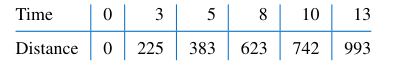



In [ ]:
f = lambda t,d: d/t
t2 = np.array([0, 3, 5, 8, 10, 13])
d = np.array([0, 225, 383, 623, 742, 993])

df2 = pd.DataFrame({"Tempo": t2, "Distancia": d})
df2["Velocidad"] = np.nan

#Velocidad instantánea en los extremos
df2.loc[0, "Velocidad"] = (d[1] - d[0]) / (t2[1] - t2[0])
df2.loc[len(t2) - 1, "Velocidad"] = (d[-1] - d[-2]) / (t2[-1] - t2[-2])

#Velocidad datos interiores
for i in range (1, len(t2)-1):
  df2.loc[i, "Velocidad"] = (d[i+1] - d[i-1])/(t2[i+1]-t2[i-1])
df2

,Tempo,Distancia,Velocidad
0,0,0,75.000000
1,3,225,76.600000
2,5,383,79.600000
3,8,623,71.800000
4,10,742,74.000000
5,13,993,83.666667


In [ ]:
vel = df2["Velocidad"]
P2 = lagrange(t2, vel)

print(f"La velocidad para t=12 sería {P2(12)} m/s")

La velocidad para t=12 sería 83.75199999999961 m/s


# 3.

Para un cohete, se recabaron los datos siguientes de la distancia
recorrida $y$ versus el tiempo $t$:

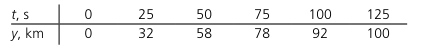

Use diferenciación numérica para estimar la velocidad y aceleración
del cohete en cada momento.

In [ ]:
t3 = np.array([0, 25, 50, 75, 100, 125])
y = np.array([0, 32, 58, 78, 92, 100])
y = y * 1000  #Pasamos de km a m

df3 = pd.DataFrame({'Tiempo (s)': t3, 'Distancia (m)': y})
vel2 = np.zeros(len(t3))
ac = np.zeros(len(t3))

#Velocidad instantánea en los extremos
vel2[0] = (y[1] - y[0]) / (t3[1] - t3[0])
vel2[-1] = (y[-1] - y[-2]) / (t3[-1] - t3[-2])

#Velocidad datos interiores
for i in range(1, len(t3)-1):
  vel2[i] = (y[i+1] - y[i-1])/(t3[i+1]-t3[i-1])

#Aceleración en los interiores
for i in range(1, len(t3)-1):
  ac[i] = (y[i+1]-2*y[i]+y[i-1])/((t3[i+1]-t3[i-1])**2)

#Aceleración puntos exteriores
ac[0] = (vel2[1] - vel2[0])/(t3[1] - t3[0])
ac[-1] = (vel2[-1] - vel2[-2])/(t3[-1] - t3[-2])

df3["Velocidad"] = vel2
df3["Aceleración"] = ac

df3

,Tiempo (s),Distancia (m),Velocidad,Aceleración
0,0,0,1280.0,-4.8
1,25,32000,1160.0,-2.4
2,50,58000,920.0,-2.4
3,75,78000,680.0,-2.4
4,100,92000,440.0,-2.4
5,125,100000,320.0,-4.8


#4.
El potencial eléctrico de un anillo de radio $R$, en su parte superior $z$ viene dado por:


\begin{equation}
V = \frac{kq_{tot}}{\sqrt{z^2+R^2}}
\end{equation}

Calcule el campo eléctrico para $z>0$ y $R=0.1$ mm. Reescale el problema en unidades de $kq_{tot}$ empleando:

**a.** La librearia sympy.

**b.** Calcular el campo en el punto  $z = 0.1$ mm empleando el metodo np.grad

**c.** Calcular el campo para diferentes valores de $z$ con $z>0$,  empleando np.grad Construya un gráfico de $E$ vs $z$.

---
Recuerde que la componente $z$ del campo electrico esta dado por:

\begin{equation}
E_z = - \frac{\partial V}{\partial z}
\end{equation}

In [ ]:
#a)
z = sp.symbols('z')

#Potencial V
v = 1/sp.sqrt(z**2 + (1e-4)**2)

#Campo E
E = -sp.diff(v, z)
print(f"La componente z del campo del anillo está dada por la expresión: ")
E

La componente z del campo del anillo está dada por la expresión: 


z/(z**2 + 1.0e-8)**(3/2)

Text(0.5, 1.0, 'Campo eléctrico E vs z')

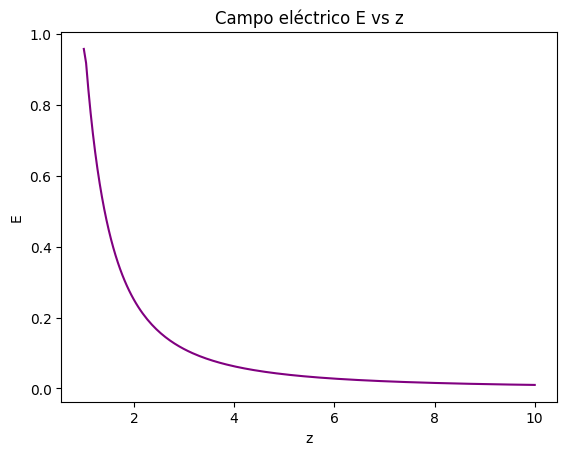

In [ ]:
#c)
v_ = lambda z: 1/np.sqrt(z**2 + (1e-4)**2)

z_vals = np.linspace(1, 10, 200)
E_vals = -np.gradient(v_(z_vals), z_vals)

plt.plot(z_vals, E_vals, color="purple")
plt.xlabel('z')
plt.ylabel('E')
plt.title("Campo eléctrico E vs z")


In [ ]:
#b
E_func = sp.lambdify(z, E, 'numpy')
E_func(1e-4)

35355339.05932738